In [1]:
# from https://data36.com/plot-histogram-python-pandas/

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import csv

ctf_dump_file = "irmin-replay.ctf.dump"

In [2]:
# maintain a dict, mapping allocation size to number of allocs
allocs = dict()

# and a simple list of alloc sizes
xs = []

with open(ctf_dump_file) as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        #print(', '.join(row))
        entry_type = row[0]
        if (entry_type == 'a' or entry_type == 'A'):
            sz = int(row[2])
            xs.append(int(sz))
            if sz in allocs:
                allocs[sz] = allocs[sz]+1
            else:
                allocs[sz] = 1

#print(allocs)
#print(xs)

In [3]:
#allocs.keys()
#allocs.values()
ys = np.array(list(allocs.items()))
ys

array([[376181,      1],
       [     4,   2191],
       [    12,      9],
       [     5,   1383],
       [     2,   2826],
       [     1,   1188],
       [     8,   1191],
       [     7,    188],
       [     3,    621],
       [     6,    401],
       [     9,    199],
       [    11,     67],
       [    10,     93],
       [    32,    133],
       [    14,     22],
       [    15,     61],
       [    16,      6],
       [    13,     10],
       [125004,      1],
       [   380,      1],
       [  6250,      1],
       [  1379,      1],
       [    28,      3],
       [   923,      1],
       [   677,      1],
       [  1751,      1],
       [ 18401,      1],
       [  2116,      1],
       [    20,      1],
       [    17,      1],
       [  1145,      1],
       [    39,      1],
       [  8193,      1]])

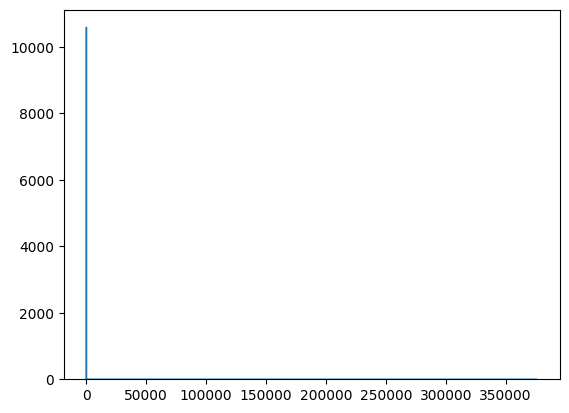

In [4]:
x = xs
counts, bins = np.histogram(x,1000)
plt.stairs(counts,bins)

In [5]:
counts

array([10595,     2,     1,     2,     1,     1,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     1,     0,
           0,     0,     0,     1,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [6]:
bins

array([1.0000000e+00, 3.7718000e+02, 7.5336000e+02, ..., 3.7542864e+05,
       3.7580482e+05, 3.7618100e+05])

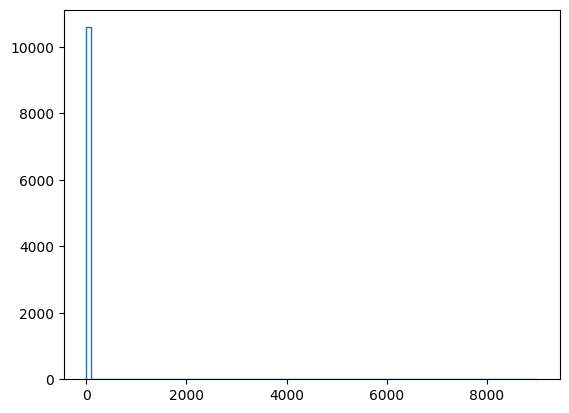

In [7]:
x=xs
counts, bins = np.histogram(x,range=(0,9000),bins=100)
plt.stairs(counts,bins)

In [8]:
# sum allocs.items; split into "small" vs "large" allocs
def compute_ratio_small_large(max_small_sz,allocs_grouped_by_size):
    allocs = allocs_grouped_by_size
    def is_small(sz): return sz <= max_small_sz
    total_small_allocs = sum([ v for (k,v) in allocs.items() if is_small(k) ])
    total_large_allocs = sum([ v for (k,v) in allocs.items() if not is_small(k) ])
    percentage_large = 100.0 * total_large_allocs / (total_small_allocs+total_large_allocs)
    total = total_small_allocs+total_large_allocs
    return { "total_small_allocs":total_small_allocs,
            "total_large_allocs": total_large_allocs,
            "total":total,
           "percentage_large": percentage_large}

x = compute_ratio_small_large(127,allocs)

print("Percentage large allocs of total: ", x["percentage_large"] , "(total is "+str(x["total"])+")")

# for max_small_sz = 127: Percentage large allocs of total:  11.271880303849427 (total is 689947)

Percentage large allocs of total:  0.1131328368058829 (total is 10607)
